# Identifying Upstream and Downstream Controllers

**Author:** [Charles Tapley Hoyt](https://github.com/cthoyt/)

**Estimated Run Time:**

## Imports

In [9]:
import sys
import time
import os

import pybel
import pybel.examples
import pybel_tools
import pybel_tools.analysis
from pybel_tools.visualization import to_jupyter

## Environment

In [2]:
print(sys.version)

3.6.3 (default, Oct  9 2017, 09:47:56) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


In [3]:
print(time.asctime())

Wed Mar 21 13:29:56 2018


## Dependencies

In [4]:
pybel.utils.get_version()

'0.11.2-dev'

In [5]:
pybel_tools.utils.get_version()

'0.5.2-dev'

In [ ]:
path = os.path.join(
    os.environ["BMS_BASE"], "aetionomy", "alzheimers", "cdr_sb_associations.bel"
)

In [12]:
graph = pybel.from_path(path)

Line 0000419 - IllegalAnnotationValueWarning: "Nucleus" is not defined in the CellStructure annotation
Line 0000425 - MissingNamespaceNameWarning: "respiratory chain complex" is not in the GOBP namespace
Line 0000427 - General Parser Failure: del(p(HGNC:KAT8)) -> path(SDIS:"mitochondrial damage")
Line 0000442 - MissingNamespaceNameWarning: "mitochondria" is not in the MESHCS namespace


In [13]:
to_jupyter(graph)

<IPython.core.display.Javascript object>

False


/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure

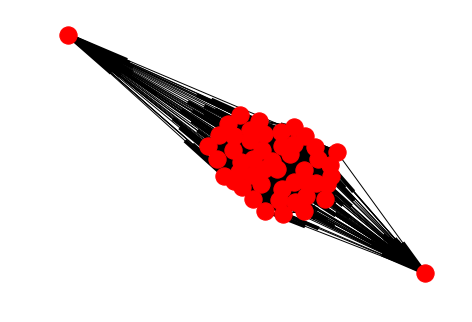

In [37]:
G = nx.binomial_graph(n=50, p=0.5, directed=True)

print(nx.is_directed_acyclic_graph(G))
%matplotlib inline
nx.draw(G)

In [42]:
for _ in range(5):
    list(nx.dfs_postorder_nodes(g))[0]

47
47
47
47
47


In [35]:
import networkx as nx
import pandas as pd
from collections import defaultdict


def pseudotoposort_runner(g, trials=None):
    """

    1. Randomly select a spanning DAG with a randomized DFS
    2. Return topological sort
    3. Repeat multiple times

    Return a matrix with one axis - nodes, one axis - position

    :param graph:
    :param Optional[int] trials: Number of trials to run. Defaults to 100.
    :rtype: list[list]
    """
    if nx.is_directed_acyclic_graph(g):
        raise ValueError("Graph is a dag!")

    r = defaultdict(lambda: defaultdict(int))

    for _ in range(100):
        order = nx.dfs_postorder_nodes(g)
        for i, node in enumerate(order):
            r[i][node] += 1

    result = pd.DataFrame(r)
    result[result.isna()] = 0

    return result.astype(int)


pseudotoposort_runner(G)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,100,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,100,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,100,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,100,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,100,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
